In [1]:
#importaciones
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import _converter
%matplotlib inline 
plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)
import datetime
sns.set(style="whitegrid") # seteando tipo de grid en seaborn
%matplotlib inline

In [2]:
df_edu = pd.read_csv("../datos_navent_fiuba/fiuba_1_postulantes_educacion.csv")
df_gen_edad = pd.read_csv("../datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv", parse_dates=['fechanacimiento'])
df_vistas = pd.read_csv("../datos_navent_fiuba/fiuba_3_vistas.csv", parse_dates=['timestamp'])
df_postulaciones = pd.read_csv("../datos_navent_fiuba/fiuba_4_postulaciones.csv", parse_dates=['fechapostulacion'])

df_vistas["date"] = df_vistas["timestamp"].dt.date
df_postulaciones["date"] = df_vistas["timestamp"].dt.date
date_ini = datetime.date(year=2018,month=2,day=27)
date_fin = datetime.date(year=2018,month=2,day=28)
df_periodo_postulaciones = df_postulaciones[df_postulaciones["date"] >= date_ini]
df_periodo_vistas = df_vistas[(df_vistas["date"] >= date_ini) & (df_vistas["date"] <= date_fin)]




In [3]:
orden_nombre = {
    "Doctorado":0,
    "Master":1,
    "Posgrado":2,
    "Universitario":3,
    "Terciario/Técnico":4,
    "Secundario":5,
    "Otro":6
}

orden_estado = {
    "Graduado":0,
    "En Curso":1,
    "Abandonado":2,
}

df_edu["prioridad_nom"] = df_edu["nombre"].apply(lambda nombre: orden_nombre.get(nombre))
df_edu["prioridad_est"] = df_edu["estado"].apply(lambda estado: orden_estado.get(estado))

df_edu.sort_values(by= ["idpostulante","prioridad_est","prioridad_nom"],inplace= True)

df_edu_unicos_max = df_edu.drop_duplicates(subset = "idpostulante",keep= "first")


#df_sum_post = df_periodo_postulaciones.groupby("idpostulante")["postulacion"].count()

#df_sum_vista =  df_periodo_vistas.groupby("idpostulante")["vista"].sum().reset_index()

#df_edu_post = df_edu_unicos_max.merge(df_sum_post, on="idpostulante" ,how="inner").groupby("nombre")["postulacion",].sum().reset_index()

#df_edu_vista = df_edu_unicos_max.merge(df_sum_vista, on="idpostulante" ,how="left").groupby("nombre")["vista",].sum().reset_index()



In [4]:
df_periodo_vistas.drop_duplicates(subset = "idpostulante",keep= "first").shape

(53711, 4)

In [5]:
df_sum_vistas= df_periodo_vistas.groupby("idpostulante")["idAviso",].count().reset_index()
df_sum_vistas.rename(columns= {"idAviso" : "Vistas"}, inplace=True)

In [6]:
df_periodo_postulaciones.drop_duplicates(subset = "idpostulante",keep= "first").shape

(28494, 4)

In [7]:
print "vistas",df_periodo_vistas.shape
print "postulaciones",df_periodo_postulaciones.shape

vistas (459305, 4)
postulaciones (500128, 4)


In [8]:
df_sum_post= df_periodo_postulaciones.groupby("idpostulante")["idaviso",].count().reset_index()
df_sum_post.rename(columns= {"idaviso" : "Postulaciones"}, inplace=True)

In [9]:
#ruzo las vistas
df_edu_vistas = df_edu_unicos_max.join(df_sum_vistas.set_index('idpostulante'),on="idpostulante", how= "inner")
df_edu_vistas["Vistas"].sum()

435254

In [10]:
#cruzo las postulaciones 
df_edu_vistas_post = df_edu_vistas.join(df_sum_post.set_index('idpostulante'),on="idpostulante", how= "inner")

In [11]:
df_edu_vistas_post["Vistas"].sum()

60920

In [12]:
df_edu_vistas_post["Postulaciones"].sum()

164328

hay muchos maaas de postulaciones que vistas

In [15]:
df_edu_vistas_post = df_edu_vistas_post.groupby("nombre")["Vistas","Postulaciones"].sum()
df_edu_vistas_post

,Vistas,Postulaciones
nombre,,
Doctorado,26,29
Master,522,1069
Otro,1088,2825
Posgrado,1118,2987
Secundario,29789,78042
Terciario/Técnico,8303,21995
Universitario,20074,57381


In [19]:
total_vistas = float(df_edu_vistas_post["Vistas"].sum())
total_postulaciones = float(df_edu_vistas_post["Postulaciones"].sum())

In [53]:
df_edu_vistas_post["%Vistas"] = df_edu_vistas_post["Vistas"].apply(lambda x: round(x/total_vistas*100))
df_edu_vistas_post["%Postulaciones"] = df_edu_vistas_post["Postulaciones"].apply(lambda x: round(x/total_postulaciones*100))

df_edu_vistas_post= df_edu_vistas_post.reset_index(drop=True)
df_edu_vistas_post["prioridad"]= df_edu_vistas_post["nombre"].apply(lambda nom: orden_nombre.get(nom))
df_edu_vistas_post = df_edu_vistas_post.sort_values(by= "prioridad",ascending= False)
df_edu_vistas_post = df_edu_vistas_post.set_index(keys="nombre")


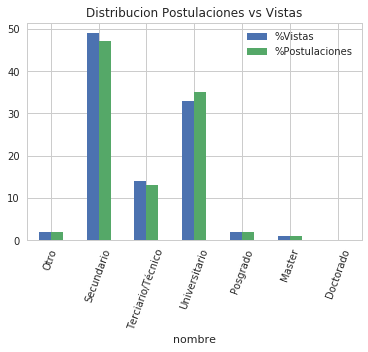

In [59]:
df_edu_vistas_post[["%Vistas","%Postulaciones"]].plot(kind="bar", title="Distribucion Postulaciones vs Vistas", rot= 70)